In [71]:
# Importing essential libraries for web scraping, data manipulation, and machine learning evaluation.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


### dataset is scraped from Turbo.az 
### web scraping project link: https://github.com/heydar432/Web-scraping/tree/main/Turbo.az%20web%20scraping%20project

In [72]:


# Read Excel data into DataFrame

df = pd.read_excel('Turbo_az_Kia_all_vehicles.xlsx',)

# Remove unneeded columns from DataFrame

del df['Contact_number']
del df['Product_link']
del df['Unnamed: 0']
del df['Brand']

In [73]:
df = df.drop_duplicates()

In [74]:
df

,City,Model,Year,Body Type,Color,Engine Details,Mileage,Transmission,Drive Type,İs_New?,Seat Count,Owner Count,Condition,Origin,Price,Saler_name
0,Bakı,Cerato,2019,Sedan,Boz,2.0 L/150 a.g./Benzin,25 000 km,Avtomat,Ön,Xeyr,5,değer yok,"Vuruğu yoxdur, rənglənməyib",Amerika,30 500 AZN,"Avtosalon ""Eurocar"""
1,Bakı,Sorento,2015,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,44 000 km,Avtomat,Tam,Xeyr,değer yok,1,"Vuruğu yoxdur, rənglənməyib",Koreya,46 500 AZN,"Avtosalon ""AEN Cars"""
2,Bakı,Cerato,2022,Sedan,Ağ,1.6 L/130 a.g./Benzin,0 km,Avtomat,Ön,Bəli,5,değer yok,"Vuruğu yoxdur, rənglənməyib",Avropa,37 900 AZN,Kia Motors Azerbaijan
3,Sumqayıt,Rio,2023,Hetçbek,Ağ,1.4 L/107 a.g./Benzin,0 km,Avtomat,Ön,Bəli,değer yok,değer yok,"Vuruğu yoxdur, rənglənməyib",değer yok,35 300 AZN,Kia Motors Sumqayıt
4,Bakı,Cerato,2020,Sedan,Göy,1.6 L/130 a.g./Benzin,54 000 km,Avtomat,Ön,Xeyr,5,1,"Vuruğu yoxdur, rənglənib",Rəsmi diler,36 500 AZN,Xanlar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,Bakı,Ceed,2007,Hetçbek,Qara,1.6 L/115 a.g./Dizel,224 400 km,Mexaniki,Ön,Xeyr,5,2,"Vuruğu yoxdur, rənglənməyib",Avropa,13 400 AZN,Şahin
3402,Bakı,Optima,2016,Sedan,Ağ,1.7 L/141 a.g./Dizel,118 000 km,Avtomat,Arxa,Xeyr,5,1,"Vuruğu yoxdur, rənglənməyib",Koreya,31 800 AZN,Emin
3403,Bakı,Sorento,2015,Offroader / SUV,Ağ,2.0 L/184 a.g./Dizel,122 650 km,Avtomat,Tam,Xeyr,5,2,"Vuruğu yoxdur, rənglənməyib",Koreya,41 500 AZN,Dilqem
3404,Bakı,Optima,2016,Sedan,Ağ,2.0 L/274 a.g./Benzin,166 000 km,Avtomat,Ön,Xeyr,4,1,"Vuruğu yoxdur, rənglənib",değer yok,31 850 AZN,Orxan


In [75]:
# columns which inside have 'değer yok' so 'None' values:

none_columns_list = ['Owner Count', 'Origin','Condition', 'Seat Count']

print('None_proportion :')
for i in none_columns_list:
    print(i, round(len(df[df[i]=='değer yok'])/len(df),4))



None_proportion :
Owner Count 0.3058
Origin 0.2732
Condition 0.0013
Seat Count 0.2336


### Data preprocessing and feature engineering for the DataFrame


In [76]:

# Splitting 'Price' into numeric value and currency type
split_result = df['Price'].str.split(' ', n=2, expand=True)
df['Price'] = split_result[0]+split_result[1]
df['currency'] = split_result[2]

# Converting 'Price' to integer type and adjusting it to USD
df['Price'] = df['Price'].astype('int')
df['Adjusted_Price (USD)'] = df.apply(lambda row: round((row['Price'] / 1.7),3) if row['currency'] == 'AZN' else row['Price'], axis=1)

# Extracting engine details and condition features
df[['volume_motor', 'hp', 'oil_type']] = df['Engine Details'].str.split('/', expand=True)
df[['crash','Painted']] = df['Condition'].str.split(',', expand=True)

# Deleting columns that are no longer needed
del df['Engine Details']
del df['Condition']

# Extracting mileage, engine volume, and horsepower features
df['Mileage (km)'] = df['Mileage'].str.split('km', n=1).str[0]
df['volume_motor (L)'] = df['volume_motor'].str.split('L', n=1).str[0]
df['HP'] = df['hp'].str.split('a.g.', n=1).str[0]

# Deleting temporary columns
del df['Mileage']
del df['volume_motor']
del df['hp']
del df['Price']
del df['currency']

# Cleaning and converting columns to proper types
df['Mileage (km)'] = df['Mileage (km)'].str.replace(' ','').astype(int)
df['HP'] = df['HP'].str.replace(' ','').astype(int)
df['volume_motor (L)'] = df['volume_motor (L)'].str.replace(' ','').astype(float)
df['Painted'] = df['Painted'].str.replace(' ','')

# Save original values to use for reverting back from NaN
original_values = df['Seat Count'].copy()

# Use pd.to_numeric to convert valid numbers to numeric and set invalid parsing to NaN
df['Seat Count'] = pd.to_numeric(df['Seat Count'], errors='coerce')

# Use fillna to replace NaN with original string values
df['Seat Count'] = df['Seat Count'].fillna(original_values)

In [77]:
df_copy = df.copy()


In [78]:
# Encoding categorical variables through mapping
city_mapping = {'Bakı': 1}
df['City'] = df['City'].map(city_mapping).fillna(0).astype(int)

trans_mapping = {'Avtomat': 3,'Mexaniki':2, 'Robotlaşdırılmış':1}
df['Transmission'] = df['Transmission'].map(trans_mapping)

isnew_mapping = {'Bəli': 1,'Xeyr': 0}
df['İs_New?'] = df['İs_New?'].map(isnew_mapping)

# Converting categorical variables to frequency encoding
for i in ['Body Type','Color','Drive Type','oil_type']:
    df[i] = df[i].map(df[i].value_counts(normalize=True).to_dict())

df['Seat Count'] = df.apply(lambda row: 5 if row['Model'] == 'Clarus' else row['Seat Count'], axis=1)

target_encoder = ce.TargetEncoder()
df['Model'] = target_encoder.fit_transform(df['Model'], df['Adjusted_Price (USD)'])

# Update 'Owner Count' to 0 if 'Mileage (km)' is 0, else keep as is.

df['Owner Count'] = df.apply(lambda row: 0 if row['Mileage (km)'] == 0 else row['Owner Count'], axis=1)

# Filter rows where the 'Saler_name' column contains "Kia Motors", case-insensitive
filtered_df = df[df['Saler_name'].str.contains('Kia Motors', case=False, na=False)]

# Create a dictionary where keys are the index of the rows in filtered_df and values are 1
filtered_index_map = {index: 1 for index in filtered_df.index}

# Map the dictionary to a new column, filling non-matching rows with 0
df['Saler_name'] = df.index.map(filtered_index_map).fillna(0).astype(int)

# filling null values
df['Painted'].fillna(df['Painted'].mode()[0], inplace=True)

# Replacing missing or 'değer yok' values in 'crash' column with the most frequent value (mode)
df['crash'] = df['crash'].replace('değer yok', df['crash'].mode()[0])

# Function to replace 'değer yok' with the mode 'Seat Count' value for the same 'Model'
def replace_deger_yok_with_mode(group):
    mode_value = group[group != 'değer yok'].mode().iloc[0] if not group[group != 'değer yok'].mode().empty else 'değer yok'
    return group.replace('değer yok', mode_value)

# Apply the function within each 'Model' group using transform
df['Seat Count'] = df.groupby('Model')['Seat Count'].transform(replace_deger_yok_with_mode)

# to replace 'değer yok' with the mode 'Origin' value for the same 'Model'
df['Origin'] = df.groupby('Model')['Origin'].transform(replace_deger_yok_with_mode)

crash_mapping = {'Vuruğu yoxdur': 1,'Vuruğu var': 0}
df['crash'] = df['crash'].map(crash_mapping)

painted_mapping = {'rənglənməyib': 1,'rənglənib': 0}
df['Painted'] = df['Painted'].map(painted_mapping)

df['Origin'] = df['Origin'].map(df['Origin'].value_counts(normalize=True).to_dict())

# Replace 'değer yok' with NaN in the 'Owner Count' column
df['Owner Count'].replace('değer yok', float('NaN'), inplace=True)

# Replacing '4 və daha çox' in 'Owner Count' with integer 4 and '8+' in 'Seat Count' with integer 8, then converting 'Seat Count' to integer type

df['Owner Count'].replace('4 və daha çox', int(4), inplace=True)

df['Seat Count'].replace('8+', int(8), inplace=True)

df['Seat Count'] = df['Seat Count'].astype(int)

# Count the occurrences of each unique value in 'crash' column
value_counts = df['crash'].value_counts(normalize=True)

# Find the missing values
missing_values = df['crash'].isna()

# Fill missing values based on the distribution of non-missing values
df.loc[missing_values, 'crash'] = np.random.choice(value_counts.index, size=missing_values.sum(), p=value_counts.values)



# convert to to numeric before modelling
df = df.apply(pd.to_numeric, errors='coerce')

# If 'Mileage (km)' is 0, set 'Owner Count' to 0
df.loc[df['Mileage (km)'] == 0, 'Owner Count'] = 0


# If 'Mileage (km)' is not 0 and 'Owner Count' is 0, set 'Owner Count' to 1
df.loc[(df['Mileage (km)'] != 0) & (df['Owner Count'] == 0), 'Owner Count'] = 1


### Filling 'None' values using Random Forest Classifier algorithm

# Separate columns
X = df.drop('Owner Count', axis=1)  # Features
y = df['Owner Count']  # Target

# Separate rows with and without 'NaN' in 'Owner Count'
X_missing = X[y.isnull()]
y_missing = y[y.isnull()]

X_not_missing = X[y.notnull()]
y_not_missing = y[y.notnull()]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_not_missing, y_not_missing, test_size=0.2)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Owner Count variable none filling Accuracy:", accuracy_score(y_test, y_pred))

# Predict and fill missing values
y_missing_pred = clf.predict(X_missing)
df.loc[y.isnull(), 'Owner Count'] = y_missing_pred

Owner Count variable none filling Accuracy: 0.6584615384615384


### Price Prediction with Multiple Regression Algorithm

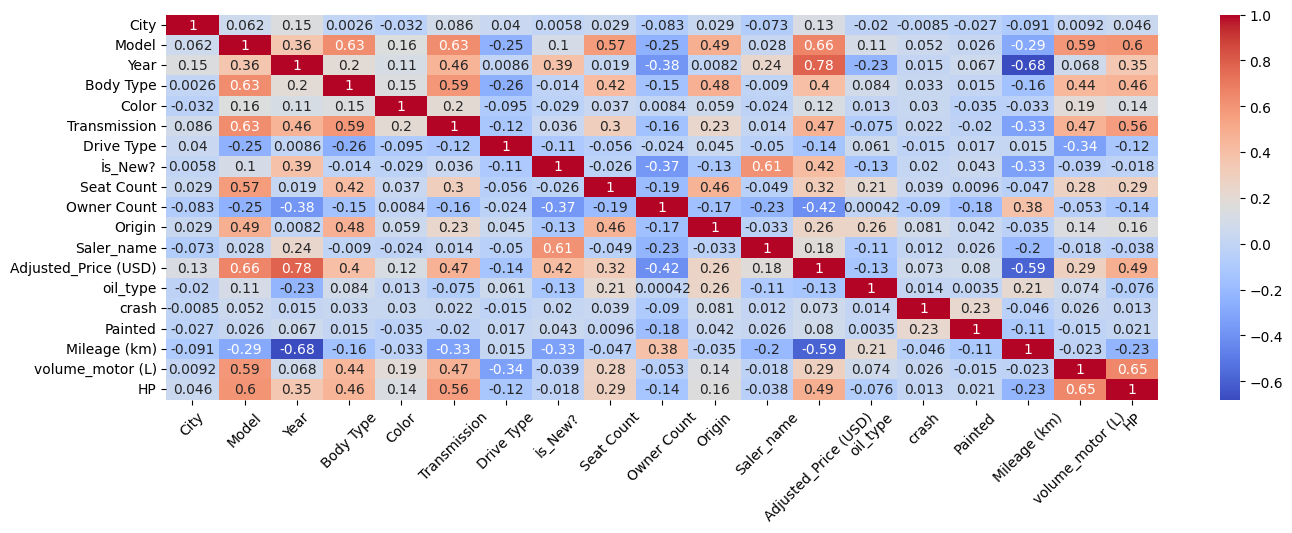

In [79]:
# Create a figure and set the size
plt.figure(figsize=(16, 5))

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [80]:
# there is neither high pozitife nor high negative correlation between independent variables. so there is no multicollinearity problem

In [81]:
# correlations with target feature

feat_corr = {}

for i in df.columns:
    if i !='Adjusted_Price (USD)':
        feat_corr.update({i:round(df['Adjusted_Price (USD)'].corr(df[i]),3)})
        print('Adjusted_Price (USD)', 'corr with', i, ':', round(df['Adjusted_Price (USD)'].corr(df[i]),3))

Adjusted_Price (USD) corr with City : 0.131
Adjusted_Price (USD) corr with Model : 0.664
Adjusted_Price (USD) corr with Year : 0.779
Adjusted_Price (USD) corr with Body Type : 0.396
Adjusted_Price (USD) corr with Color : 0.122
Adjusted_Price (USD) corr with Transmission : 0.47
Adjusted_Price (USD) corr with Drive Type : -0.138
Adjusted_Price (USD) corr with İs_New? : 0.415
Adjusted_Price (USD) corr with Seat Count : 0.319
Adjusted_Price (USD) corr with Owner Count : -0.417
Adjusted_Price (USD) corr with Origin : 0.264
Adjusted_Price (USD) corr with Saler_name : 0.178
Adjusted_Price (USD) corr with oil_type : -0.135
Adjusted_Price (USD) corr with crash : 0.073
Adjusted_Price (USD) corr with Painted : 0.08
Adjusted_Price (USD) corr with Mileage (km) : -0.591
Adjusted_Price (USD) corr with volume_motor (L) : 0.29
Adjusted_Price (USD) corr with HP : 0.487


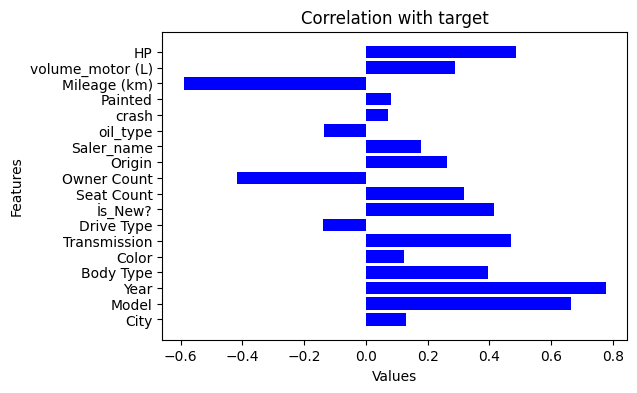

In [82]:
# Create the bar graph
plt.figure(figsize=(6, 4))
plt.barh(list(feat_corr.keys()), list(feat_corr.values()), color='blue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')
plt.title('Correlation with target')

# Show the graph
plt.show()

In [83]:
# Set display format for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Separate columns
X = df.drop(['Adjusted_Price (USD)', 'crash', 'Painted'], axis=1)
y = df['Adjusted_Price (USD)']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model with sklearn
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Calculate statistics
mse = np.mean(residuals**2)
r2 = model.score(X_test, y_test)
n = X_test.shape[0]
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Standard error of the regression coefficients
X_with_const = np.column_stack([np.ones(X_train.shape[0]), X_train])
matrix = np.dot(X_with_const.T, X_with_const)
inv_matrix = np.linalg.inv(matrix)
se = np.sqrt(mse * np.diag(inv_matrix))

# t-values and p-values
t_values = model.coef_ / se[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k - 1)) for t in t_values]

# Create a dataframe for coefficients and their statistics
summary_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns),
    'Coefficient': [model.intercept_] + list(model.coef_),
    'Standard Error': [se[0]] + list(se[1:]),
    't-value': [model.intercept_ / se[0]] + list(t_values),
    'p-value': [2 * (1 - stats.t.cdf(np.abs(model.intercept_ / se[0]), df=n - k - 1))] + p_values
})

# Round off the values
summary_df = summary_df.round(3)

# Calculate Explained Variation and Unexplained Variation
y_mean = np.mean(y_test)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum(residuals**2)

# Calculate the F-statistic
F_statistic = (SSR/k) / (SSE/(n - k - 1))

# Compute the p-value for the overall model
p_value_model = 1 - stats.f.cdf(F_statistic, k, n-k-1)

# Print overall statistics
print(f"Number of observations: {n}")
print(f"R-squared: {r2:.3f}")
print(f"Adjusted R-squared: {adj_r2:.3f}")
print(f"F-statistic: {F_statistic:.3f}")
print(f"Model p-value: {p_value_model:.3f}")

# Display the table
print("\nRegression Coefficients and Statistics:")
display(summary_df)


Number of observations: 455
R-squared: 0.828
Adjusted R-squared: 0.821
F-statistic: 144.235
Model p-value: 0.000

Regression Coefficients and Statistics:


,Feature,Coefficient,Standard Error,t-value,p-value
0,Intercept,-2079154.084,57054.895,-36.441,0.000
1,City,336.370,195.714,1.719,0.086
2,Model,0.639,0.032,20.253,0.000
3,Year,1039.608,28.339,36.685,0.000
4,Body Type,35.781,803.040,0.045,0.964
5,Color,943.803,868.164,1.087,0.278
6,Transmission,-3395.174,293.774,-11.557,0.000
7,Drive Type,-844.658,330.558,-2.555,0.011
8,İs_New?,10648.323,711.422,14.968,0.000
9,Seat Count,589.772,101.429,5.815,0.000


In [84]:
# Filtering based on 'p-value'
features_with_high_pvalue = summary_df[summary_df['p-value'] > 0.05]['Feature'].tolist()

print(f"Features that do not contribute significantly to the model: {features_with_high_pvalue}")


Features that do not contribute significantly to the model: ['City', 'Body Type', 'Color', 'Owner Count', 'volume_motor (L)']


In [85]:
# Calculate scores after removing features that do not contribute significantly to the model

# Set display format for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Separate columns 
X = df.drop(['Adjusted_Price (USD)', 'crash', 'Painted']+features_with_high_pvalue, axis=1) # removing features that do not contribute significantly to the model
y = df['Adjusted_Price (USD)']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model with sklearn
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Calculate statistics
mse = np.mean(residuals**2)
r2 = model.score(X_test, y_test)
n = X_test.shape[0]
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Standard error of the regression coefficients
X_with_const = np.column_stack([np.ones(X_train.shape[0]), X_train])
matrix = np.dot(X_with_const.T, X_with_const)
inv_matrix = np.linalg.inv(matrix)
se = np.sqrt(mse * np.diag(inv_matrix))

# t-values and p-values
t_values = model.coef_ / se[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k - 1)) for t in t_values]

# Create a dataframe for coefficients and their statistics
summary_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns),
    'Coefficient': [model.intercept_] + list(model.coef_),
    'Standard Error': [se[0]] + list(se[1:]),
    't-value': [model.intercept_ / se[0]] + list(t_values),
    'p-value': [2 * (1 - stats.t.cdf(np.abs(model.intercept_ / se[0]), df=n - k - 1))] + p_values
})

# Round off the values
summary_df = summary_df.round(3)

# Calculate Explained Variation and Unexplained Variation
y_mean = np.mean(y_test)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum(residuals**2)

# Calculate the F-statistic
F_statistic = (SSR/k) / (SSE/(n - k - 1))

# Compute the p-value for the overall model
p_value_model = 1 - stats.f.cdf(F_statistic, k, n-k-1)

print("\nAfter removing features that do not contribute significantly to the model:\n")

# Print overall statistics
print(f"Number of observations: {n}")
print(f"R-squared: {r2:.3f}")
print(f"Adjusted R-squared: {adj_r2:.3f}")
print(f"F-statistic: {F_statistic:.3f}")
print(f"Model p-value: {p_value_model:.3f}")

# Display the table
print("\nRegression Coefficients and Statistics:")
display(summary_df)



fter removing features that do not contribute significantly to the model:

Number of observations: 455
R-squared: 0.828
Adjusted R-squared: 0.824
F-statistic: 212.839
Model p-value: 0.000

Regression Coefficients and Statistics:


,Feature,Coefficient,Standard Error,t-value,p-value
0,Intercept,-2085682.227,53918.666,-38.682,0.000
1,Model,0.653,0.030,21.936,0.000
2,Year,1042.979,26.814,38.897,0.000
3,Transmission,-3307.717,273.072,-12.113,0.000
4,Drive Type,-947.377,312.326,-3.033,0.003
5,İs_New?,10804.283,689.405,15.672,0.000
6,Seat Count,590.984,99.979,5.911,0.000
7,Origin,5237.379,625.286,8.376,0.000
8,Saler_name,-9596.352,969.635,-9.897,0.000
9,oil_type,-8054.015,1053.320,-7.646,0.000


In [96]:
# Initialize the main lookup dictionary
lookup_dict = {}

# Populate the dictionary
for col in df.columns:
    lookup_dict[col] = {}
    for i, val in enumerate(df[col]):
        lookup_val = df_copy.iloc[i][col]
        lookup_dict[col][lookup_val] = val

# Example lookups
lookup_values = ['Ceed',2009,'Mexaniki','Ön','Xeyr', 5,'Amerika','Şahin','Dizel',255100,115]  # These are the values you want to look up

# Finding the corresponding values
corresponding_values = {}
for val in lookup_values:
    for col, mapping in lookup_dict.items():
        if val in mapping:
            corresponding_values[val] = mapping[val]

print(f"Corresponding values in df: {corresponding_values}")

Corresponding values in df: {'Ceed': 9108.9824660016, 2009: 2009, 'Mexaniki': 2, 'Ön': 0.8284205895292565, 'Xeyr': 0, 5: 5, 'Amerika': 0.16893972723273207, 'Şahin': 0, 'Dizel': 0.5274967003959525, 255100: 255100, 115: 115}


In [97]:
# checking the model's price prediction using some random features

print('Predicted Price (USD):',(model.predict(np.array(list(corresponding_values.values())).reshape(1,-1))))

Predicted Price (USD): [8039.06432627]
